In [26]:
#Load Libraries
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load Dataset

In [7]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names= ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url,names=names)


# Summarize the Dataset

In [15]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization

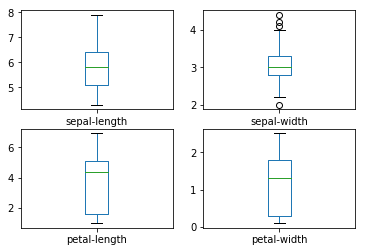

In [47]:
#Univariate Plots
# box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

#plt.boxplot(dataset.iloc[:,0]);

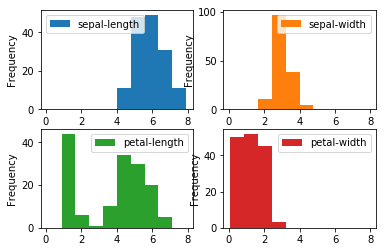

In [57]:
dataset.plot(kind='hist',subplots=True,layout=(2,2),sharex=False,sharey=False,bins=10)
plt.show()

/home/sharafath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


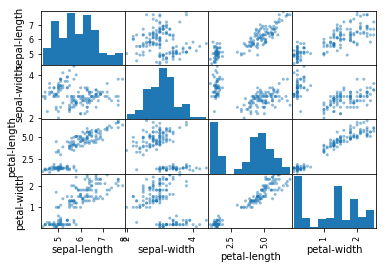

In [62]:
# Multivariate Plots
scatter_matrix(dataset)
plt.show();

# Evaluate Some Algorithms

In [68]:
# Split-out validation dataset
array=dataset.values
x=array[:,0:4]
y=array[:,4]
validation_size=0.20
seed=7
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)

## Test Harness

In [69]:
#We will use 10-fold cross validation to estimate accuracy.
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


## Build Models

In [78]:
#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
    

LR: 0.966667(0.040825)
LDA: 0.975000(0.038188)
KNN: 0.983333(0.033333)
CART: 0.975000(0.038188)
NB: 0.975000(0.053359)
SVM: 0.991667(0.025000)


## Select Best Model

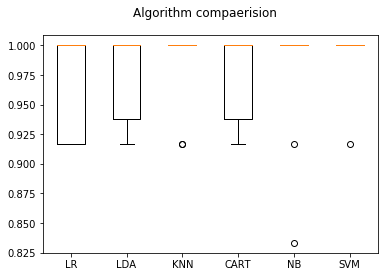

In [102]:
# Compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm compaerision')
ax=fig.add_subplot(111)
plt.boxplot(results);
ax.set_xticklabels(names)
plt.show()

# Make Predictions

In [107]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(x_train, y_train)
predictions=svm.predict(x_validation)
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))


0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



# Just for trying stacked plot

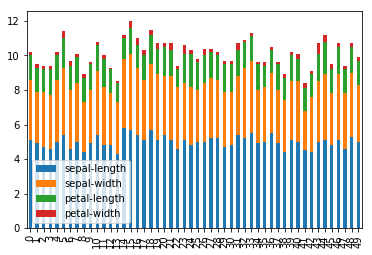

In [113]:
pd.crosstab(dataset['sepal-length'],dataset['sepal-width'])
dataset.head(50).plot(kind="bar",stacked=True,grid=False);